## Create a custom simulation for the DRC

1. Import required packages

In [21]:
import covasim as cv
import numpy as np

2. Define parameters and country for base model

In [22]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    # pop_size = 100000,  # population of the DRC is 87 million. Note that when I despecify this, it goes down to 20,000 people which must be default for DRC
    pop_infected = 100, # 3,615 infected as of 12th March https://www.worldometers.info/coronavirus/country/democratic-republic-of-the-congo/ 
    location = 'Democratic Republic of the Congo',
    start_day = '2021-03-15',
    end_day = '2021-06-15',
    #verbose = 0 # means it won't print all the output 
)


# other things you can re-define in pars include n_days

3. Take a look at population characteristics from input data (of country (location) as defined above)

Initializing sim with 20000 people for 92 days
Loading location-specific data for "Democratic Republic of the Congo"


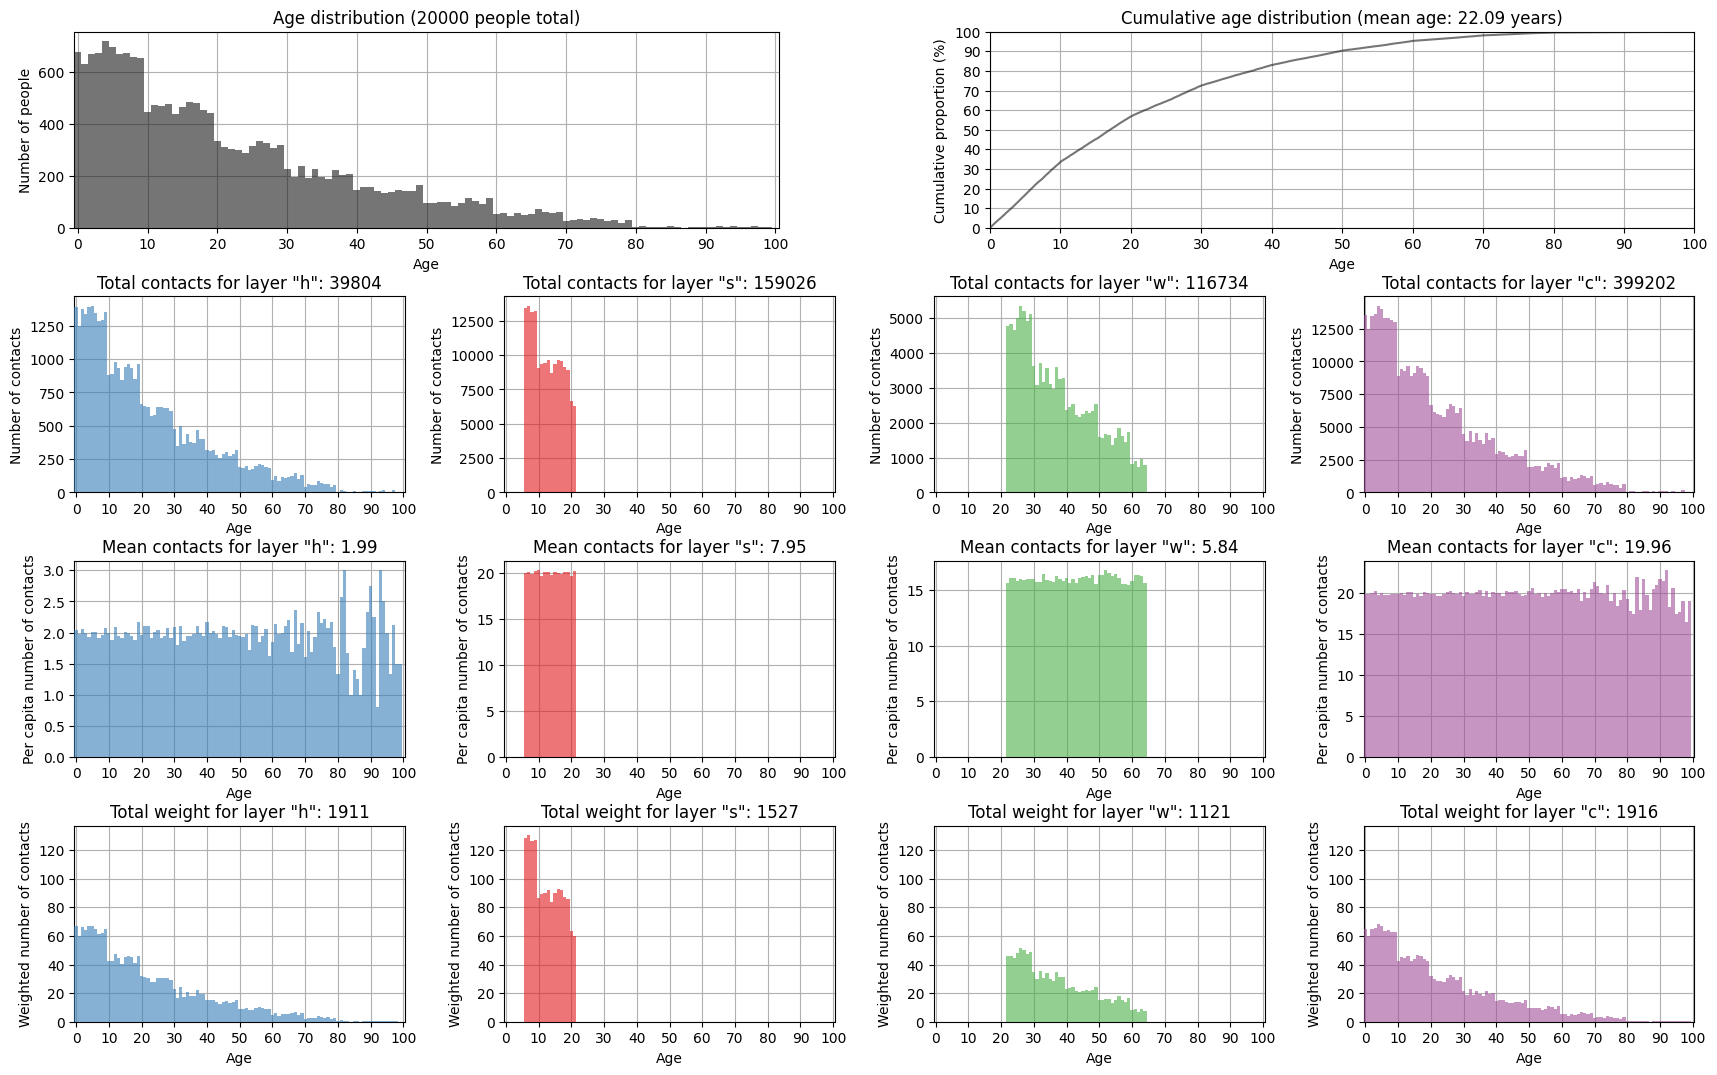

In [23]:
cv.options.set(dpi=100, show=False, close=True) #, verbose=0 # ) # put back in verbose once i've figured out what this does
sim = cv.Sim(pars)
sim.initialize()
fig = sim.people.plot()

3. Define comparative scenarios 

In [24]:
def protect_elderly(sim):
    if sim.t == sim.day('2021-04-01'):
        elderly = sim.people.age >65  # I'm resetting 65
        sim.people.rel_sus[elderly] = 0.5 # this is saying that shielding won't affect the elderly population's underlying susceptibility to severe disease
        # this would change in the case of vaccination for example. if 0 = perfect, if 1= no effect. So e.g. vaccionation could be 0.1 (90% reduction in susceptibility)
        

In [36]:
# Define the vaccine subtargeting
def vaccinate_by_age(sim):
    young  = cv.true(sim.people.age < 50) # cv.true() returns indices of people matching this condition, i.e. people under 50
    middle = cv.true((sim.people.age >= 50) * (sim.people.age < 75)) # Multiplication means "and" here
    old    = cv.true(sim.people.age > 75)
    inds = sim.people.uid # Everyone in the population -- equivalent to np.arange(len(sim.people))
    vals = np.ones(len(sim.people)) # Create the array
    vals[young] = 0.1 # 10% probability for people <50
    vals[middle] = 0.5 # 50% probability for people 50-75
    vals[old] = 0.9 # 90% probbaility for people >75
    output = dict(inds=inds, vals=vals)
    return output

# Define the vaccine
vaccine = cv.vaccine(days=20, rel_sus=0.1, rel_symp=0.06, subtarget=vaccinate_by_age)


In [31]:
def apply(sim): # this is for any vaccination
    if sim.t == sim.day('2021-04-15'): # i'm setting a situation where vaccination is introduced for all this age group on 15th
        elderly = sim.people.age >65
        sim.people.rel_sus[elderly] = 0.1 # and it reduces their chances of severe disease by 90%

3. Run simulation with scenarios included

In [ ]:
sim = cv.Sim(pars, label = 'Unmitigated')
sim2 = cv.Sim(pars, interventions=protect_elderly, label = 'Protect the elderly')
sim3 = cv.Sim(pars, interventions=apply, label = 'Vaccinate over 50s')
sim4 = cv.Sim(pars, interventions=vaccinate_by_age, label = 'Vaccinate by age')
msim = cv.MultiSim([sim, sim2, sim3, sim4])
msim.run()
sim.run()  # this will just run the base scenario

Initializing sim with 20000 people for 92 days
Initializing sim with 20000 people for 92 days
Loading location-specific data for "Democratic Republic of the Congo"Initializing sim with 20000 people for 92 daysLoading location-specific data for "Democratic Republic of the Congo"

Initializing sim with 20000 people for 92 days
Loading location-specific data for "Democratic Republic of the Congo"
Loading location-specific data for "Democratic Republic of the Congo"

  Running "Vaccinate over 50s": 2021-03-15 ( 0/92) (1.98 s)  ———————————————————— 1%
  Running "Protect the elderly": 2021-03-15 ( 0/92) (2.00 s)  ———————————————————— 1%


  Running "Vaccinate over 50s": 2021-03-25 (10/92) (2.20 s)  ••—————————————————— 12%
  Running "Protect the elderly": 2021-03-25 (10/92) (2.22 s)  ••—————————————————— 12%
  Running "Vaccinate by age": 2021-03-25 (10/92) (2.21 s)  ••—————————————————— 12%

  Running "Vaccinate over 50s": 2021-04-04 (20/92) (2.45 s)  ••••———————————————— 23%
  Running "Prot

4. Plot results 

In [34]:
scenariofig = sim.plot()  #  this will only work if I run sim.run() not msim.run()

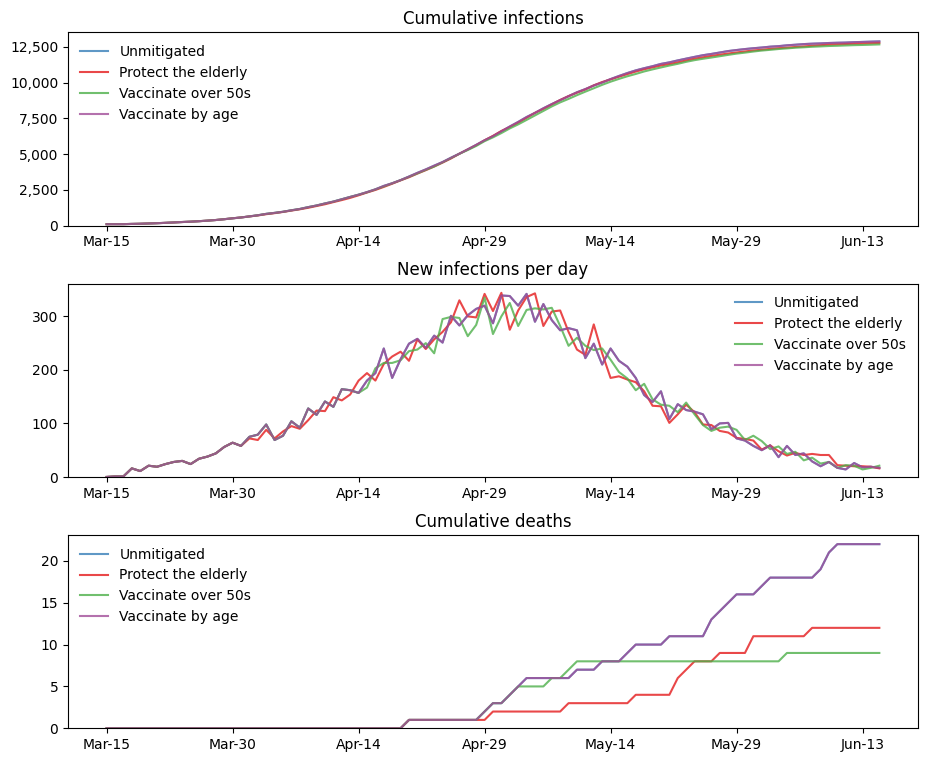

In [35]:
fig2 = msim.plot(to_plot= ['cum_deaths', 'new_infections'])
# plots different scenarios against one another
msim.plot()

In [17]:
sim.save('drc-sim.sim')
sim.to_excel('drc-sim.xlsx')

Object saved to /Users/sophieayling/Documents/GitHub/covasim/docs/tutorials/drc-sim.xlsx.
